# Алешко Альберт АС-21-05
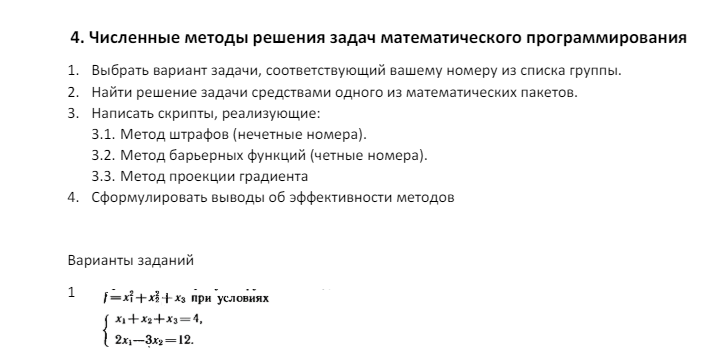

In [34]:
import numpy as np
import time
import pandas as pd
from scipy.optimize import minimize

## Целевая функция

In [35]:
# Objective function
def objective(x):
    x1, x2, x3 = x
    return x1**2 + x2**2 + x3

In [36]:
# Определяем ограничения
def constraint1(x):
    return x[0] + x[1] + x[2] - 4

def constraint2(x):
    return 2*x[0] - 3*x[1] - 12

# Начальное приближение
x0 = [0, 0, 0]

# Ограничения в формате словаря
cons = [{'type': 'eq', 'fun': constraint1},
        {'type': 'eq', 'fun': constraint2}]

# Границы переменных (если они необходимы)
bounds = [(None, None), (None, None), (None, None)]

# Решение задачи
start_time = time.time()
solution = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)
end_time = time.time()
obj_time = end_time - start_time
# Выводим результаты
optimal_solution = solution.x
objective_value = solution.fun
print("Optimal Solution: ", optimal_solution)
print("Objective Value: ", objective_value)
print(solution)

Optimal Solution:  [ 2.42307679 -2.38461547  3.96153868]
Objective Value:  15.519230769230793
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 15.519230769230793
       x: [ 2.423e+00 -2.385e+00  3.962e+00]
     nit: 5
     jac: [ 4.846e+00 -4.769e+00  1.000e+00]
    nfev: 21
    njev: 5


In [38]:
# Penalty method
def penalty(x, lambdas):
    x1, x2, x3 = x
    g1 = x1 + x2 + x3 - 4
    g2 = 2*x1 - 3*x2 - 12
    return lambdas[0] * g1**2 + lambdas[1] * g2**2

def penalty_objective(x, lambdas):
    return objective(x) + penalty(x, lambdas)

def solve_penalty(x0, lambdas):
    start_time = time.time()
    result = minimize(penalty_objective, x0, args=(lambdas,), method='SLSQP')
    print("Penalty\n",result)
    end_time = time.time()
    # return 0, 0, 0
    return result.x, objective(result.x), end_time - start_time

# Gradient projection method
def grad_objective(x):
    x1, x2, x3 = x
    return np.array([2*x1, 2*x2, 1])

def constraints(x):
    x1, x2, x3 = x
    return [x1 + x2 + x3 - 4, 2*x1 - 3*x2 - 12]

def projection(x):
    cons = [{'type': 'eq', 'fun': lambda x: x[0] + x[1] + x[2] - 4},
            {'type': 'eq', 'fun': lambda x: 2*x[0] - 3*x[1] - 12}]
    result = minimize(lambda y: np.linalg.norm(y - x), x, constraints=cons)
    return result.x

def gradient_projection(x0, alpha=0.01, tol=1e-4, max_iter=100000):
    x = np.array(x0)
    start_time = time.time()
    for _ in range(max_iter):
        grad = grad_objective(x)
        x_new = x - alpha * grad
        x_proj = projection(x_new)
        # print(_)
        if np.linalg.norm(x_proj - x) < tol:
            print("\ngrad iter\n",_)
            break
        x = x_proj
    end_time = time.time()
    return x, objective(x), end_time - start_time

# Initial guess
x0 = [0, 0, 0]

# Solve using each method
lambdas = [100, 100]

penalty_solution, penalty_objective_value, penalty_time = solve_penalty(x0, lambdas)
gradient_solution, gradient_objective_value, gradient_time = gradient_projection(x0)

# Create a comparison table
data = {
    "Method": ["Penalty Method", "Gradient Projection", "Math method"],
    "Solution (x1, x2, x3)": [penalty_solution, gradient_solution, optimal_solution],
    "Objective Value": [penalty_objective_value, gradient_objective_value, objective_value],
    "Time (s)": [penalty_time, gradient_time, obj_time]
}

df = pd.DataFrame(data)

df

Penalty
  message: Optimization terminated successfully
 success: True
  status: 0
     fun: 15.507492313642317
       x: [ 2.422e+00 -2.382e+00  3.956e+00]
     nit: 5
     jac: [ 0.000e+00  2.384e-07 -1.192e-07]
    nfev: 27
    njev: 5

grad iter
 708


,Method,"Solution (x1, x2, x3)",Objective Value,Time (s)
0,Penalty Method,"[2.421593684700156, -2.3824015491189847, 3.955...",15.495761,0.003003
1,Gradient Projection,"[2.4338043573649575, -2.3774637617566947, 3.94...",15.519397,3.539639
2,Math method,"[2.423076791204793, -2.384615472530138, 3.9615...",15.519231,0.003742
